In [1]:
# default_exp algo.ml.tree.lgb

# LightGBM, Light Gradient Boosting Machine

https://github.com/microsoft/LightGBM

https://lightgbm.readthedocs.io/en/latest/

LightGBM是使用基于树的学习算法的梯度增强框架。 它被设计为分布式且高效的，具有以下优点：

     训练速度更快，效率更高。

     降低内存使用率。

     更好的准确性。

     支持并行和GPU学习。

     能够处理大规模数据。

## install

In [81]:
# !pip install lightgbm -U
!pip freeze | grep lightgbm

lightgbm==2.3.1


# python guide
https://github.com/microsoft/LightGBM/tree/master/examples/python-guide

https://lightgbm.readthedocs.io/en/latest/Python-API.html

## simple_example
https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py


    Construct Dataset
    Basic train and predict
    Eval during training
    Early stopping
    Save model to file


In [4]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:47: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [37]:
data_dir = '../data/lgb_data/'

In [38]:
print('Loading data...')
# load or create your dataset
df_train = pd.read_csv(data_dir + 'regression/regression.train', header=None, sep='\t')
df_test = pd.read_csv(data_dir + 'regression/regression.test', header=None, sep='\t')

Loading data...


In [31]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.869,-0.635,0.226,0.327,-0.690,0.754,-0.249,-1.092,0.000,...,-0.010,-0.046,3.102,1.354,0.980,0.978,0.920,0.722,0.989,0.877
1,1,0.908,0.329,0.359,1.498,-0.313,1.096,-0.558,-1.588,2.173,...,-1.139,-0.001,0.000,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1,0.799,1.471,-1.636,0.454,0.426,1.105,1.282,1.382,0.000,...,1.129,0.900,0.000,0.910,1.108,0.986,0.951,0.803,0.866,0.780
3,0,1.344,-0.877,0.936,1.992,0.882,1.786,-1.647,-0.942,0.000,...,-0.678,-1.360,0.000,0.947,1.029,0.999,0.728,0.869,1.027,0.958
4,1,1.105,0.321,1.522,0.883,-1.205,0.681,-1.070,-0.922,0.000,...,-0.374,0.113,0.000,0.756,1.361,0.987,0.838,1.133,0.872,0.808


In [7]:
y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [8]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.9,
    'seed': 14,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

Starting training...
[1]	valid_0's l2: 0.243898	valid_0's l1: 0.492841
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.240605	valid_0's l1: 0.489327
[3]	valid_0's l2: 0.236472	valid_0's l1: 0.484931
[4]	valid_0's l2: 0.232586	valid_0's l1: 0.480567
[5]	valid_0's l2: 0.22865	valid_0's l1: 0.475965
[6]	valid_0's l2: 0.226187	valid_0's l1: 0.472861
[7]	valid_0's l2: 0.223738	valid_0's l1: 0.469847
[8]	valid_0's l2: 0.221012	valid_0's l1: 0.466258
[9]	valid_0's l2: 0.218429	valid_0's l1: 0.462751
[10]	valid_0's l2: 0.215505	valid_0's l1: 0.458755
[11]	valid_0's l2: 0.213027	valid_0's l1: 0.455252
[12]	valid_0's l2: 0.210809	valid_0's l1: 0.452051
[13]	valid_0's l2: 0.208612	valid_0's l1: 0.448764
[14]	valid_0's l2: 0.207468	valid_0's l1: 0.446667
[15]	valid_0's l2: 0.206009	valid_0's l1: 0.444211
[16]	valid_0's l2: 0.20465	valid_0's l1: 0.44186
[17]	valid_0's l2: 0.202489	valid_0's l1: 0.438508
[18]	valid_0's l2: 0.200668	valid_0's l1: 0.435919
[19]	valid_0

## sklearn_example
https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/sklearn_example.py


    Create data for learning with sklearn interface
    Basic train and predict with sklearn interface
    Feature importances with sklearn interface
    Self-defined eval metric with sklearn interface
    Find best parameters for the model with sklearn's GridSearchCV


In [9]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [10]:
data_dir = '../data/lgb_data/'

In [11]:
print('Loading data...')
# load or create your dataset
df_train = pd.read_csv(data_dir + 'regression.train', header=None, sep='\t')
df_test = pd.read_csv(data_dir + 'regression.test', header=None, sep='\t')

Loading data...


In [15]:
y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

### train

In [16]:
print('Starting training...')
# train
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

Starting training...
[1]	valid_0's l2: 0.242763	valid_0's l1: 0.491735
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.237895	valid_0's l1: 0.486563
[3]	valid_0's l2: 0.233277	valid_0's l1: 0.481489
[4]	valid_0's l2: 0.22925	valid_0's l1: 0.476848
[5]	valid_0's l2: 0.226155	valid_0's l1: 0.47305
[6]	valid_0's l2: 0.222963	valid_0's l1: 0.469049
[7]	valid_0's l2: 0.220364	valid_0's l1: 0.465556
[8]	valid_0's l2: 0.217872	valid_0's l1: 0.462208
[9]	valid_0's l2: 0.215328	valid_0's l1: 0.458676
[10]	valid_0's l2: 0.212743	valid_0's l1: 0.454998
[11]	valid_0's l2: 0.210805	valid_0's l1: 0.452047
[12]	valid_0's l2: 0.208945	valid_0's l1: 0.449158
[13]	valid_0's l2: 0.206986	valid_0's l1: 0.44608
[14]	valid_0's l2: 0.205513	valid_0's l1: 0.443554
[15]	valid_0's l2: 0.203728	valid_0's l1: 0.440643
[16]	valid_0's l2: 0.201865	valid_0's l1: 0.437687
[17]	valid_0's l2: 0.200639	valid_0's l1: 0.435454
[18]	valid_0's l2: 0.199522	valid_0's l1: 0.433288
[19]	valid_0

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### predict

In [18]:
print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred[:5]

Starting predicting...


array([0.68205502, 0.4812164 , 0.37969294, 0.45091878, 0.38236335])

In [19]:
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 0.4441153344254208


In [20]:
# feature importances
print('Feature importances:', list(gbm.feature_importances_))

Feature importances: [23, 7, 0, 33, 5, 56, 9, 1, 1, 21, 2, 5, 1, 19, 9, 6, 1, 10, 4, 10, 0, 31, 61, 4, 48, 102, 52, 79]


### self-defined eval metric

In [21]:
# self-defined eval metric
# f(y_true: array, y_pred: array) -> name: string, eval_result: float, is_higher_better: bool
# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False


print('Starting training with custom eval function...')
# train
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=rmsle,
        early_stopping_rounds=5)

Starting training with custom eval function...
[1]	valid_0's l2: 0.242763	valid_0's RMSLE: 0.344957
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.237895	valid_0's RMSLE: 0.341693
[3]	valid_0's l2: 0.233277	valid_0's RMSLE: 0.338462
[4]	valid_0's l2: 0.22925	valid_0's RMSLE: 0.335656
[5]	valid_0's l2: 0.226155	valid_0's RMSLE: 0.333431
[6]	valid_0's l2: 0.222963	valid_0's RMSLE: 0.331104
[7]	valid_0's l2: 0.220364	valid_0's RMSLE: 0.329193
[8]	valid_0's l2: 0.217872	valid_0's RMSLE: 0.327337
[9]	valid_0's l2: 0.215328	valid_0's RMSLE: 0.325433
[10]	valid_0's l2: 0.212743	valid_0's RMSLE: 0.323523
[11]	valid_0's l2: 0.210805	valid_0's RMSLE: 0.321986
[12]	valid_0's l2: 0.208945	valid_0's RMSLE: 0.320523
[13]	valid_0's l2: 0.206986	valid_0's RMSLE: 0.319027
[14]	valid_0's l2: 0.205513	valid_0's RMSLE: 0.317796
[15]	valid_0's l2: 0.203728	valid_0's RMSLE: 0.316383
[16]	valid_0's l2: 0.201865	valid_0's RMSLE: 0.314827
[17]	valid_0's l2: 0.200639	valid_0's 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
# another self-defined eval metric
# f(y_true: array, y_pred: array) -> name: string, eval_result: float, is_higher_better: bool
# Relative Absolute Error (RAE)
def rae(y_true, y_pred):
    return 'RAE', np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true)), False


print('Starting training with multiple custom eval functions...')
# train
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=lambda y_true, y_pred: [rmsle(y_true, y_pred), rae(y_true, y_pred)],
        early_stopping_rounds=5)


Starting training with multiple custom eval functions...
[1]	valid_0's l2: 0.242763	valid_0's RMSLE: 0.344957	valid_0's RAE: 0.991146
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.237895	valid_0's RMSLE: 0.341693	valid_0's RAE: 0.98072
[3]	valid_0's l2: 0.233277	valid_0's RMSLE: 0.338462	valid_0's RAE: 0.970493
[4]	valid_0's l2: 0.22925	valid_0's RMSLE: 0.335656	valid_0's RAE: 0.961139
[5]	valid_0's l2: 0.226155	valid_0's RMSLE: 0.333431	valid_0's RAE: 0.953484
[6]	valid_0's l2: 0.222963	valid_0's RMSLE: 0.331104	valid_0's RAE: 0.945419
[7]	valid_0's l2: 0.220364	valid_0's RMSLE: 0.329193	valid_0's RAE: 0.938379
[8]	valid_0's l2: 0.217872	valid_0's RMSLE: 0.327337	valid_0's RAE: 0.931631
[9]	valid_0's l2: 0.215328	valid_0's RMSLE: 0.325433	valid_0's RAE: 0.92451
[10]	valid_0's l2: 0.212743	valid_0's RMSLE: 0.323523	valid_0's RAE: 0.917099
[11]	valid_0's l2: 0.210805	valid_0's RMSLE: 0.321986	valid_0's RAE: 0.911151
[12]	valid_0's l2: 0.208945	valid_0'

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [23]:
print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The rmsle of prediction is:', rmsle(y_test, y_pred)[1])
print('The rae of prediction is:', rae(y_test, y_pred)[1])

Starting predicting...
The rmsle of prediction is: 0.3110323289863278
The rae of prediction is: 0.8645881044669875


### GridSearchCV

In [24]:
# other scikit-learn modules
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}


## advanced_example: 二分类
https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/advanced_example.py


    Construct Dataset
    Set feature names
    Directly use categorical features without one-hot encoding
    Save model to file
    Dump model to JSON format
    Get feature names
    Get feature importances
    Load model to predict
    Dump and load model with pickle
    Load model file to continue training
    Change learning rates during training
    Change any parameters during training
    Self-defined objective function
    Self-defined eval metric
    Callback function


In [75]:
data_dir = '../data/lgb_data/'

In [76]:
import json
import lightgbm as lgb
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error

try:
    import cPickle as pickle
except BaseException:
    import pickle

print('Loading data...')
# load or create your dataset
df_train = pd.read_csv(os.path.join(data_dir, 'binary_classification/binary.train'), header=None, sep='\t')
df_test = pd.read_csv(os.path.join(data_dir, 'binary_classification/binary.test'), header=None, sep='\t')
W_train = pd.read_csv(os.path.join(data_dir, 'binary_classification/binary.train.weight'), header=None)[0]
W_test = pd.read_csv(os.path.join(data_dir, 'binary_classification/binary.test.weight'), header=None)[0]

y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

Loading data...


In [77]:
df_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.869,-0.635,0.226,0.327,-0.690,0.754,-0.249,-1.092,0.000,...,-0.010,-0.046,3.102,1.354,0.980,0.978,0.920,0.722,0.989,0.877
1,1,0.908,0.329,0.359,1.498,-0.313,1.096,-0.558,-1.588,2.173,...,-1.139,-0.001,0.000,0.302,0.833,0.986,0.978,0.780,0.992,0.798


In [78]:
num_train, num_feature = X_train.shape

# create dataset for lightgbm
# if you want to re-use data, remember to set free_raw_data=False
lgb_train = lgb.Dataset(X_train, y_train,
                        weight=W_train, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train,
                       weight=W_test, free_raw_data=False)

In [79]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# generate feature names
feature_name = ['feature_' + str(col) for col in range(num_feature)]

print('Starting training...')
# feature_name and categorical_feature
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_eval,  # eval training data
                feature_name=feature_name,
                categorical_feature=[21])

print('Finished first 10 rounds...')

Starting training...
[1]	valid_0's binary_logloss: 0.680748
[2]	valid_0's binary_logloss: 0.674315
[3]	valid_0's binary_logloss: 0.66601
[4]	valid_0's binary_logloss: 0.657738
[5]	valid_0's binary_logloss: 0.649475
[6]	valid_0's binary_logloss: 0.644301
[7]	valid_0's binary_logloss: 0.639224
[8]	valid_0's binary_logloss: 0.633376
[9]	valid_0's binary_logloss: 0.627411
[10]	valid_0's binary_logloss: 0.622683
Finished first 10 rounds...


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1225: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [21]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:776: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


In [46]:
# check feature name
print('7th feature name is:', lgb_train.feature_name[6])

print('Saving model...')
# save model to file
gbm.save_model(os.path.join(data_dir, 'data_gen/model.txt'))

7th feature name is: feature_6
Saving model...


In [47]:
print('Dumping model to JSON...')
# dump model to JSON (and save to file)
model_json = gbm.dump_model()

with open(os.path.join(data_dir, 'data_gen/model.json'), 'w+') as f:
    json.dump(model_json, f, indent=4)

Dumping model to JSON...


In [48]:
# feature names
print('Feature names:', gbm.feature_name())

# feature importances
print('Feature importances:', list(gbm.feature_importance()))

Feature names: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27']
Feature importances: [16, 5, 6, 19, 0, 29, 4, 0, 2, 17, 1, 3, 0, 10, 2, 2, 0, 2, 1, 4, 0, 0, 31, 3, 36, 42, 29, 36]


In [49]:
print('Loading model to predict...')
# load model to predict
bst = lgb.Booster(model_file='model.txt')
# can only predict with the best iteration (or the saving iteration)
y_pred = bst.predict(X_test)
# eval with loaded model
print("The rmse of loaded model's prediction is:", mean_squared_error(y_test, y_pred) ** 0.5)

Loading model to predict...
The rmse of loaded model's prediction is: 0.44512434910807497


In [50]:
print('Dumping and loading model with pickle...')
# dump model with pickle
with open(os.path.join(data_dir, 'data_gen/model.pkl'), 'wb') as fout:
    pickle.dump(gbm, fout)
# load model with pickle to predict
with open(os.path.join(data_dir, 'data_gen/model.pkl'), 'rb') as fin:
    pkl_bst = pickle.load(fin)

Dumping and loading model with pickle...


In [51]:
# can predict with any iteration when loaded in pickle way
y_pred = pkl_bst.predict(X_test, num_iteration=7)
# eval with loaded model
print("The rmse of pickled model's prediction is:", mean_squared_error(y_test, y_pred) ** 0.5)


The rmse of pickled model's prediction is: 0.4725970120939472


### continue training

In [54]:
# continue training
# init_model accepts:
# 1. model file name
# 2. Booster()
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=os.path.join(data_dir, 'data_gen/model.txt'),
                valid_sets=lgb_eval)

print('Finished 10 - 20 rounds with model file...')

[11]	valid_0's binary_logloss: 0.662756
[12]	valid_0's binary_logloss: 0.655754
[13]	valid_0's binary_logloss: 0.648102
[14]	valid_0's binary_logloss: 0.639722
[15]	valid_0's binary_logloss: 0.632029
[16]	valid_0's binary_logloss: 0.626326
[17]	valid_0's binary_logloss: 0.620506
[18]	valid_0's binary_logloss: 0.61432
[19]	valid_0's binary_logloss: 0.60916
[20]	valid_0's binary_logloss: 0.604022
Finished 10 - 20 rounds with model file...


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:828: UserWarning: The prediction of init_model will be overridden by init_score.
  warnings.warn("The prediction of init_model will be overridden by init_score.")


### decay learning rates

In [55]:
# decay learning rates
# learning_rates accepts:
# 1. list/tuple with length = num_boost_round
# 2. function(curr_iter)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm,
                learning_rates=lambda iter: 0.05 * (0.99 ** iter),
                valid_sets=lgb_eval)

print('Finished 20 - 30 rounds with decay learning rates...')

[21]	valid_0's binary_logloss: 0.662756
[22]	valid_0's binary_logloss: 0.655821
[23]	valid_0's binary_logloss: 0.648313
[24]	valid_0's binary_logloss: 0.64016
[25]	valid_0's binary_logloss: 0.63273
[26]	valid_0's binary_logloss: 0.627258
[27]	valid_0's binary_logloss: 0.62172
[28]	valid_0's binary_logloss: 0.615867
[29]	valid_0's binary_logloss: 0.611395
[30]	valid_0's binary_logloss: 0.606568
Finished 20 - 30 rounds with decay learning rates...


### change other parameters during training

In [56]:
# change other parameters during training
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm,
                valid_sets=lgb_eval,
                callbacks=[lgb.reset_parameter(bagging_fraction=[0.7] * 5 + [0.6] * 5)])

print('Finished 30 - 40 rounds with changing bagging_fraction...')

[31]	valid_0's binary_logloss: 0.662537
[32]	valid_0's binary_logloss: 0.655767
[33]	valid_0's binary_logloss: 0.64846
[34]	valid_0's binary_logloss: 0.641265
[35]	valid_0's binary_logloss: 0.634638
[36]	valid_0's binary_logloss: 0.630008
[37]	valid_0's binary_logloss: 0.62559
[38]	valid_0's binary_logloss: 0.620284
[39]	valid_0's binary_logloss: 0.615534
[40]	valid_0's binary_logloss: 0.610141
Finished 30 - 40 rounds with changing bagging_fraction...


### self-defined objective function

In [57]:
# self-defined objective function
# f(preds: array, train_data: Dataset) -> grad: array, hess: array
# log likelihood loss
def loglikelihood(preds, train_data):
    labels = train_data.get_label()
    preds = 1. / (1. + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1. - preds)
    return grad, hess

### self-defined eval metric

In [58]:
# self-defined eval metric
# f(preds: array, train_data: Dataset) -> name: string, eval_result: float, is_higher_better: bool
# binary error
# NOTE: when you do customized loss function, the default prediction value is margin
# This may make built-in evalution metric calculate wrong results
# For example, we are doing log likelihood loss, the prediction is score before logistic transformation
# Keep this in mind when you use the customization
def binary_error(preds, train_data):
    labels = train_data.get_label()
    preds = 1. / (1. + np.exp(-preds))
    return 'error', np.mean(labels != (preds > 0.5)), False

In [59]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm,
                fobj=loglikelihood,
                feval=binary_error,
                valid_sets=lgb_eval)

print('Finished 40 - 50 rounds with self-defined objective function and eval metric...')



[41]	valid_0's binary_logloss: 0.569863	valid_0's error: 0.456
[42]	valid_0's binary_logloss: 0.564835	valid_0's error: 0.456
[43]	valid_0's binary_logloss: 0.558063	valid_0's error: 0.44
[44]	valid_0's binary_logloss: 0.56096	valid_0's error: 0.418
[45]	valid_0's binary_logloss: 0.68598	valid_0's error: 0.412
[46]	valid_0's binary_logloss: 0.75912	valid_0's error: 0.394
[47]	valid_0's binary_logloss: 0.886888	valid_0's error: 0.384
[48]	valid_0's binary_logloss: 1.04184	valid_0's error: 0.36
[49]	valid_0's binary_logloss: 1.48555	valid_0's error: 0.328
[50]	valid_0's binary_logloss: 1.88823	valid_0's error: 0.318
Finished 40 - 50 rounds with self-defined objective function and eval metric...


In [60]:
print('Finished 40 - 50 rounds with self-defined objective function and eval metric...')


# another self-defined eval metric
# f(preds: array, train_data: Dataset) -> name: string, eval_result: float, is_higher_better: bool
# accuracy
# NOTE: when you do customized loss function, the default prediction value is margin
# This may make built-in evalution metric calculate wrong results
# For example, we are doing log likelihood loss, the prediction is score before logistic transformation
# Keep this in mind when you use the customization
def accuracy(preds, train_data):
    labels = train_data.get_label()
    preds = 1. / (1. + np.exp(-preds))
    return 'accuracy', np.mean(labels == (preds > 0.5)), True


gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm,
                fobj=loglikelihood,
                feval=lambda preds, train_data: [binary_error(preds, train_data),
                                                 accuracy(preds, train_data)],
                valid_sets=lgb_eval)

print('Finished 50 - 60 rounds with self-defined objective function '
      'and multiple self-defined eval metrics...')

print('Starting a new training job...')

Finished 40 - 50 rounds with self-defined objective function and eval metric...
[51]	valid_0's binary_logloss: 0.569863	valid_0's error: 0.456	valid_0's accuracy: 0.544
[52]	valid_0's binary_logloss: 0.564835	valid_0's error: 0.456	valid_0's accuracy: 0.544
[53]	valid_0's binary_logloss: 0.558063	valid_0's error: 0.44	valid_0's accuracy: 0.56
[54]	valid_0's binary_logloss: 0.56096	valid_0's error: 0.418	valid_0's accuracy: 0.582
[55]	valid_0's binary_logloss: 0.68598	valid_0's error: 0.412	valid_0's accuracy: 0.588
[56]	valid_0's binary_logloss: 0.75912	valid_0's error: 0.394	valid_0's accuracy: 0.606
[57]	valid_0's binary_logloss: 0.886888	valid_0's error: 0.384	valid_0's accuracy: 0.616
[58]	valid_0's binary_logloss: 1.04184	valid_0's error: 0.36	valid_0's accuracy: 0.64
[59]	valid_0's binary_logloss: 1.48555	valid_0's error: 0.328	valid_0's accuracy: 0.672
[60]	valid_0's binary_logloss: 1.88823	valid_0's error: 0.318	valid_0's accuracy: 0.682
Finished 50 - 60 rounds with self-define

### callback

In [61]:
# callback
def reset_metrics():
    def callback(env):
        lgb_eval_new = lgb.Dataset(X_test, y_test, reference=lgb_train)
        if env.iteration - env.begin_iteration == 5:
            print('Add a new valid dataset at iteration 5...')
            env.model.add_valid(lgb_eval_new, 'new_valid')
    callback.before_iteration = True
    callback.order = 0
    return callback


gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_train,
                callbacks=[reset_metrics()])

print('Finished first 10 rounds with callback function...')

[1]	training's binary_logloss: 0.665332
[2]	training's binary_logloss: 0.65674
[3]	training's binary_logloss: 0.648865
[4]	training's binary_logloss: 0.640197
[5]	training's binary_logloss: 0.632184
Add a new valid dataset at iteration 5...
[6]	training's binary_logloss: 0.625581	new_valid's binary_logloss: 0.65656
[7]	training's binary_logloss: 0.619373	new_valid's binary_logloss: 0.652067
[8]	training's binary_logloss: 0.612762	new_valid's binary_logloss: 0.64686
[9]	training's binary_logloss: 0.606746	new_valid's binary_logloss: 0.642939
[10]	training's binary_logloss: 0.601005	new_valid's binary_logloss: 0.63869
Finished first 10 rounds with callback function...


## plot_example

In [62]:
import lightgbm as lgb
import pandas as pd

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib for plot_example.py.')

In [63]:
data_dir = '../data/lgb_data/'

In [65]:
print('Loading data...')
# load or create your dataset
df_train = pd.read_csv(data_dir + 'regression/regression.train', header=None, sep='\t')
df_test = pd.read_csv(data_dir + 'regression/regression.test', header=None, sep='\t')

Loading data...


In [66]:
y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [67]:
# specify your configurations as a dict
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)


Starting training...
[10]	training's l2: 0.217995	training's l1: 0.457448	valid_1's l2: 0.21641	valid_1's l1: 0.456464
[20]	training's l2: 0.205099	training's l1: 0.436869	valid_1's l2: 0.201616	valid_1's l1: 0.434057
[30]	training's l2: 0.197421	training's l1: 0.421302	valid_1's l2: 0.192514	valid_1's l1: 0.417019
[40]	training's l2: 0.192856	training's l1: 0.411107	valid_1's l2: 0.187258	valid_1's l1: 0.406303
[50]	training's l2: 0.189593	training's l1: 0.403695	valid_1's l2: 0.183688	valid_1's l1: 0.398997
[60]	training's l2: 0.187043	training's l1: 0.398704	valid_1's l2: 0.181009	valid_1's l1: 0.393977
[70]	training's l2: 0.184982	training's l1: 0.394876	valid_1's l2: 0.178803	valid_1's l1: 0.389805
[80]	training's l2: 0.1828	training's l1: 0.391147	valid_1's l2: 0.176799	valid_1's l1: 0.386476
[90]	training's l2: 0.180817	training's l1: 0.388101	valid_1's l2: 0.175775	valid_1's l1: 0.384404
[100]	training's l2: 0.179171	training's l1: 0.385174	valid_1's l2: 0.175321	valid_1's l1: 

Plotting metrics recorded during training...


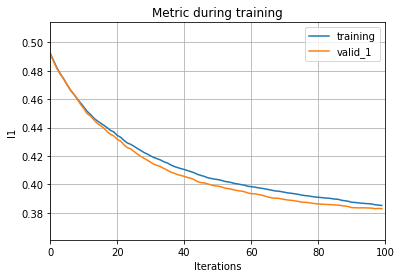

In [68]:
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

Plotting feature importances...


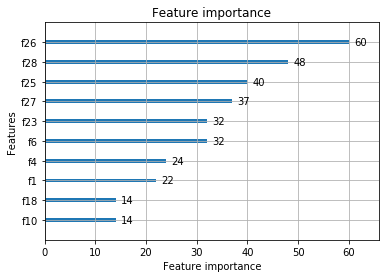

In [69]:
print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()


In [70]:
print('Plotting split value histogram...')
ax = lgb.plot_split_value_histogram(gbm, feature='f26', bins='auto')
plt.show()

Plotting split value histogram...


AttributeError: module 'lightgbm' has no attribute 'plot_split_value_histogram'

Plotting 54th tree...


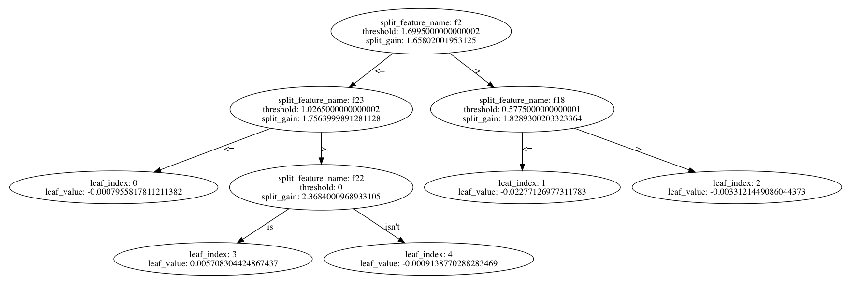

In [71]:
print('Plotting 54th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=53, figsize=(15, 15), show_info=['split_gain'])
plt.show()

In [72]:
print('Plotting 54th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=53, name='Tree54')
graph.render(view=True)

Plotting 54th tree with graphviz...


'Tree54.gv.pdf'

## interactive_plot_example
https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/notebooks/interactive_plot_example.ipynb

In [26]:
import pandas as pd
import lightgbm as lgb

import matplotlib.pyplot as plt

%matplotlib inline

try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [27]:
data_dir = '../data/lgb_data/'

In [28]:
print('Loading data...')
# load or create your dataset
df_train = pd.read_csv(data_dir + 'regression.train', header=None, sep='\t')
df_test = pd.read_csv(data_dir + 'regression.test', header=None, sep='\t')

Loading data...


In [29]:
y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [30]:
params = {
    'num_leaves': 5,
    'metric': ['l1', 'l2'],
    'verbose': -1
}
evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1225: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [21]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:776: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[10]	training's l2: 0.217995	training's l1: 0.457448	valid_1's l2: 0.21641	valid_1's l1: 0.456464
[20]	training's l2: 0.205099	training's l1: 0.436869	valid_1's l2: 0.201616	valid_1's l1: 0.434057
[30]	training's l2: 0.197421	training's l1: 0.421302	valid_1's l2: 0.192514	valid_1's l1: 0.417019
[40]	training's l2: 0.192856	training's l1: 0.411107	valid_1's l2: 0.187258	valid_1's l1: 0.406303
[50]	training's l2: 0.189593	training's l1: 0.403695	valid_1's l2: 0.183688	valid_1's l1: 0.398997
[60]	training's l2: 0.187043	training's l1: 0.398704	valid_1's l2: 0.181009	valid_1's l1: 0.393977
[70]	training's l2: 0.184982	training's l1: 0.394876	valid_1's l2: 0.178803	valid_1's l1: 0.389805
[80]	training's l2: 0.1828	training's l1: 0.391147	valid_1's l2: 0.176799	valid_1's l1: 0.386476
[90]	training's l2: 0.180817	training's l1: 0.388101	valid_1's l2: 0.175775	valid_1's l1: 0.384404
[100]	training's l2: 0.179171	training's l1: 0.385174	valid_1's l2: 0.175321	valid_1's l1: 0.382929


### Plot metrics recorded during training

In [32]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'])
else:
    render_metric(params['metric'][0])

interactive(children=(Dropdown(description='metric_name', options=('l1', 'l2'), value='l1'), Output()), _dom_c…

### Plot feature importances

In [33]:
INTERACTIVE

True

In [34]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()
    
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')


interactive(children=(Dropdown(description='importance_type', options=('split', 'gain'), value='split'), IntSl…

### Plot split value histogram

In [35]:
def render_histogram(feature):
    ax = lgb.plot_split_value_histogram(gbm, feature=feature,
                                        bins='auto', figsize=(10, 5))
    plt.show()
    
if INTERACTIVE:
    # create widget for interactive split value histogram
    interact(render_histogram,
             feature=gbm.feature_name())
else:
    render_histogram(feature='f26')



interactive(children=(Dropdown(description='feature', options=('f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',…

### Plot trees

In [36]:
def render_tree(tree_index, show_info, precision=3):
    show_info = None if 'None' in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index,
                                   show_info=show_info, precision=precision)

if INTERACTIVE:
    # create widget to switch between trees and control info in nodes
    interact(render_tree,
             tree_index=(0, gbm.num_trees() - 1),
             show_info=SelectMultiple(  # allow multiple values to be selected
                 options=['None',
                          'split_gain',
                          'internal_value',
                          'internal_count',
                          'internal_weight',
                          'leaf_count',
                          'leaf_weight',
                          'data_percentage'],
                 value=['None']),
             precision=(0, 10))
    tree = None
else:
    tree = render_tree(53, ['None'])
tree



interactive(children=(IntSlider(value=49, description='tree_index', max=99), SelectMultiple(description='show_…

# lgb+5fold
https://blog.csdn.net/qq_44643395/article/details/100556033

## 二分类

In [ ]:
param = {
    'boosting_type': 'gbdt',  # equal to 'boosting': 'gbdt'
    'objective': 'binary',
    'metric': 'binary_logloss', 'auc', 
    'num_leaves': 300,  
    'min_data_in_leaf': 500,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.8,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'lambda_l1': 0.4,  
    'lambda_l2': 0.5,  
    'min_gain_to_split': 0.2,  
    'verbose': -1,
    'seed':1024,
}

from sklearn.model_selection import KFold
# 五折交叉验证
folds = KFold(n_splits=5, shuffle=True, random_state=2019)
oof = np.zeros([len(X_train)])
predictions = np.zeros([len(X_test)])

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    print(trn_idx)
    trn_data = lgb.Dataset(X_train.iloc[trn_idx], y_train.iloc[trn_idx].map({'1': 0, '2': 1}))
    val_data = lgb.Dataset(X_train.iloc[val_idx], y_train.iloc[val_idx].map({'1': 0, '2': 1}))
 
    num_round = 1000
    # callback
    def reset_metrics():
        def callback(env):
    #         lgb_eval_new = lgb.Dataset(X_test, y_test, reference=lgb_train)
            
            if env.iteration % 100 == 1:
                rs = pd.Series(env.model.predict(X_train.iloc[val_idx]).tolist())
                rs[rs>=0.5] = 1
                rs[rs<0.5] = 0
                print(f'{env.iteration} predict...{accuracy_score(y_train.iloc[val_idx].map(lambda x: int(x)-1), rs.tolist())}')
        callback.before_iteration = False
        callback.order = 0
        return callback
    clf = lgb.train(param, 
                    trn_data, 
                    num_round, 
                    valid_sets = [trn_data, val_data], 
                    verbose_eval = 100, 
                    early_stopping_rounds = 200,
                    callbacks=[reset_metrics()])
    rs = pd.Series(clf.predict(X_train.iloc[val_idx]).tolist())
    rs[rs>=0.5] = 1
    rs[rs<0.5] = 0
    print(f'{num_round} predict...{accuracy_score(y_train.iloc[val_idx].map(lambda x: int(x)-1), rs.tolist())}')
    #oof[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)    
    predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits
    #print(predictions)

## 多分类

In [ ]:
param = { 
    'boosting_type': 'gbdt',  
    'objective': 'multiclass',  
    'num_class': 10,  
    'metric': 'multi_error',  
    'num_leaves': 300,  
    'min_data_in_leaf': 500,  
    'learning_rate': 0.01,  
    'feature_fraction': 0.8,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'lambda_l1': 0.4,  
    'lambda_l2': 0.5,  
    'min_gain_to_split': 0.2,  
    'verbose': -1,
    'seed':1024,
}
 
# 五折交叉验证
folds = KFold(n_splits=5, shuffle=False, random_state=2019)
oof = np.zeros([len(X_train),7])
predictions = np.zeros([len(X_test),7])
 
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])
 
    num_round = 1000
    clf = lgb.train(param, 
                    trn_data, 
                    num_round, 
                    valid_sets = [trn_data, val_data], 
                    verbose_eval = 100, 
                    early_stopping_rounds = 100)
    #oof[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)    
    predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits
    #print(predictions)

# lgb core params
https://lightgbm.readthedocs.io/en/latest/Parameters.html

## objective目标函数
default = regression, type = enum


### regression application

    regression, L2 loss, aliases: regression_l2, l2, mean_squared_error, mse, l2_root, root_mean_squared_error, rmse

    regression_l1, L1 loss, aliases: l1, mean_absolute_error, mae

    huber, Huber loss

    fair, Fair loss

    poisson, Poisson regression

    quantile, Quantile regression

    mape, MAPE loss, aliases: mean_absolute_percentage_error

    gamma, Gamma regression with log-link. It might be useful, e.g., for modeling insurance claims severity, or for any target that might be gamma-distributed

    tweedie, Tweedie regression with log-link. It might be useful, e.g., for modeling total loss in insurance, or for any target that might be tweedie-distributed

### binary classification application

    binary, binary log loss classification (or logistic regression)

    requires labels in {0, 1}; see cross-entropy application for general probability labels in [0, 1]

### multi-class classification application

    multiclass, softmax objective function, aliases: softmax

    multiclassova, One-vs-All binary objective function, aliases: multiclass_ova, ova, ovr

    num_class should be set as well

### cross-entropy application

    cross_entropy, objective function for cross-entropy (with optional linear weights), aliases: xentropy

    cross_entropy_lambda, alternative parameterization of cross-entropy, aliases: xentlambda

    label is anything in interval [0, 1]

### ranking application

    lambdarank, lambdarank objective. label_gain can be used to set the gain (weight) of int label and all values in label must be smaller than number of elements in label_gain

    rank_xendcg, XE_NDCG_MART ranking objective function, aliases: xendcg, xe_ndcg, xe_ndcg_mart, xendcg_mart

    rank_xendcg is faster than and achieves the similar performance as lambdarank

    label should be int type, and larger number represents the higher relevance (e.g. 0:bad, 1:fair, 2:good, 3:perfect)




## learning_rate  
default = 0.1, type = double, aliases: shrinkage_rate, eta, constraints: learning_rate > 0.0

    shrinkage rate

    in dart, it also affects on normalization weights of dropped trees

## num_leaves 
default = 31, type = int, aliases: num_leaf, max_leaves, max_leaf, constraints: 1 < num_leaves <= 131072

    max number of leaves in one tree

## seed
default = None, type = int, aliases: random_seed, random_state

    this seed is used to generate other seeds, e.g. data_random_seed, feature_fraction_seed, etc.

    by default, this seed is unused in favor of default values of other seeds

    this seed has lower priority in comparison with other seeds, which means that it will be overridden, if you set other seeds explicitly



# Learning Control Parameters
max_depth 🔗︎, default = -1, type = int

    limit the max depth for tree model. This is used to deal with over-fitting when #data is small. Tree still grows leaf-wise

    <= 0 means no limit

min_data_in_leaf 🔗︎, default = 20, type = int, aliases: min_data_per_leaf, min_data, min_child_samples, constraints: min_data_in_leaf >= 0

    minimal number of data in one leaf. Can be used to deal with over-fitting

bagging_fraction 🔗︎, default = 1.0, type = double, aliases: sub_row, subsample, bagging, constraints: 0.0 < bagging_fraction <= 1.0

    like feature_fraction, but this will randomly select part of data without resampling

    can be used to speed up training

    can be used to deal with over-fitting

    Note: to enable bagging, bagging_freq should be set to a non zero value as well

bagging_freq 🔗︎, default = 0, type = int, aliases: subsample_freq

    frequency for bagging

    0 means disable bagging; k means perform bagging at every k iteration

    Note: to enable bagging, bagging_fraction should be set to value smaller than 1.0 as well

bagging_seed 🔗︎, default = 3, type = int, aliases: bagging_fraction_seed

    random seed for bagging

feature_fraction 🔗︎, default = 1.0, type = double, aliases: sub_feature, colsample_bytree, constraints: 0.0 < feature_fraction <= 1.0

    LightGBM will randomly select part of features on each iteration (tree) if feature_fraction smaller than 1.0. For example, if you set it to 0.8, LightGBM will select 80% of features before training each tree

    can be used to speed up training

    can be used to deal with over-fitting
    
feature_fraction_seed 🔗︎, default = 2, type = int

lambda_l1 🔗︎, default = 0.0, type = double, aliases: reg_alpha, constraints: lambda_l1 >= 0.0

    L1 regularization

lambda_l2 🔗︎, default = 0.0, type = double, aliases: reg_lambda, lambda, constraints: lambda_l2 >= 0.0

    L2 regularization



# Metric Parameters

metric 🔗︎, default = "", type = multi-enum, aliases: metrics, metric_types

    metric(s) to be evaluated on the evaluation set(s)

        "" (empty string or not specified) means that metric corresponding to specified objective will be used (this is possible only for pre-defined objective functions, otherwise no evaluation metric will be added)

        "None" (string, not a None value) means that no metric will be registered, aliases: na, null, custom

        l1, absolute loss, aliases: mean_absolute_error, mae, regression_l1

        l2, square loss, aliases: mean_squared_error, mse, regression_l2, regression

        rmse, root square loss, aliases: root_mean_squared_error, l2_root

        quantile, Quantile regression

        mape, MAPE loss, aliases: mean_absolute_percentage_error

        huber, Huber loss

        fair, Fair loss

        poisson, negative log-likelihood for Poisson regression

        gamma, negative log-likelihood for Gamma regression

        gamma_deviance, residual deviance for Gamma regression

        tweedie, negative log-likelihood for Tweedie regression

        ndcg, NDCG, aliases: lambdarank, rank_xendcg, xendcg, xe_ndcg, xe_ndcg_mart, xendcg_mart

        map, MAP, aliases: mean_average_precision

        auc, AUC

        binary_logloss, log loss, aliases: binary

        binary_error, for one sample: 0 for correct classification, 1 for error classification

        auc_mu, AUC-mu

        multi_logloss, log loss for multi-class classification, aliases: multiclass, softmax, multiclassova, multiclass_ova, ova, ovr

        multi_error, error rate for multi-class classification

        cross_entropy, cross-entropy (with optional linear weights), aliases: xentropy

        cross_entropy_lambda, “intensity-weighted” cross-entropy, aliases: xentlambda

        kullback_leibler, Kullback-Leibler divergence, aliases: kldiv

    support multiple metrics, separated by ,

